In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'D:\customer_retention_dataset.csv')

In [21]:

df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [6]:
df.shape

(269, 71)

In [7]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [8]:
df.describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

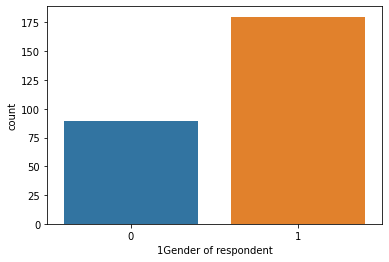

In [9]:
sns.countplot('1Gender of respondent',data=df)

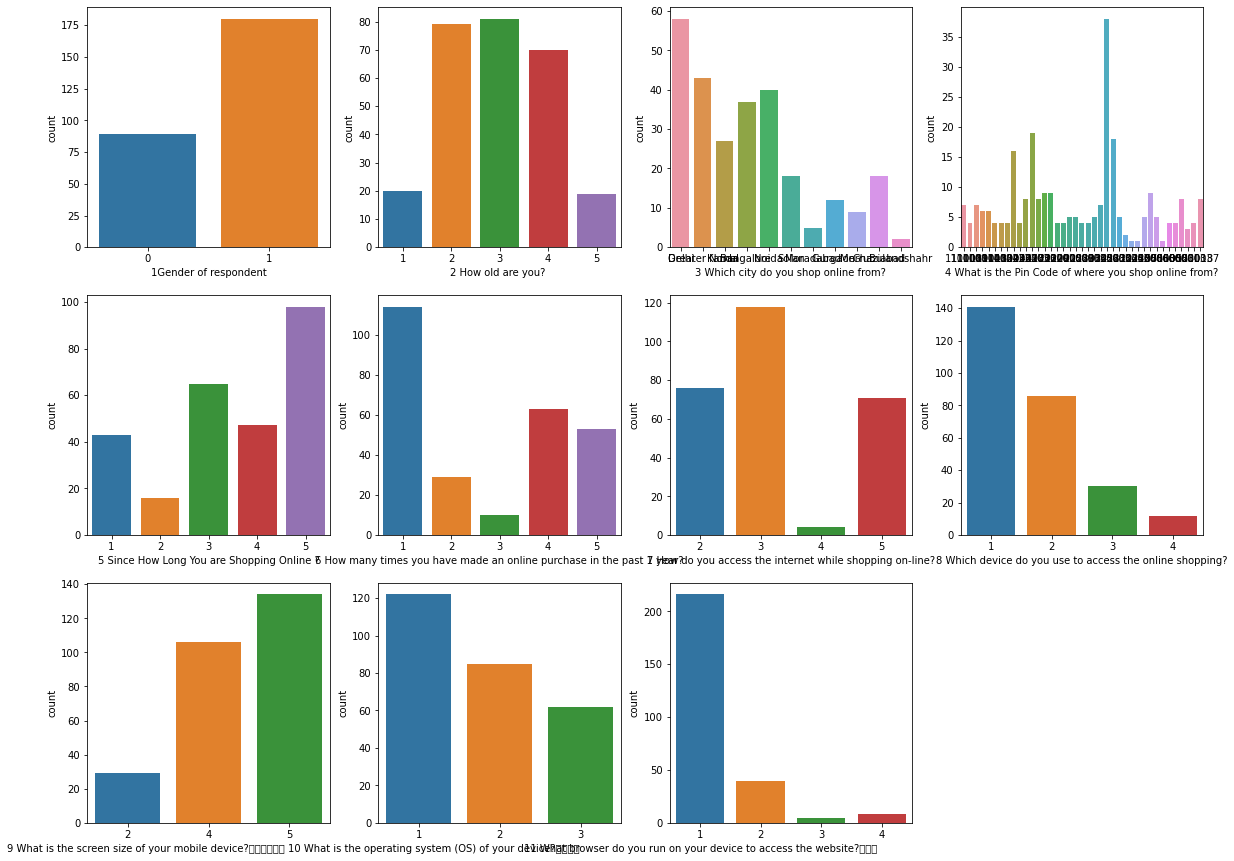

In [10]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber <=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.countplot(df[column])
    plotnumber+=1
plt.show()    
        

In [13]:
df.corr()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1Gender of respondent,1.000000,-0.034449,0.260696,-0.046005,0.076121,-0.200974,-0.241847,-0.058760,-0.038207,-0.116712,...,0.097540,0.152595,0.357061,0.201673,0.198382,-0.005218,-0.046397,0.018482,-0.113160,0.202014
2 How old are you?,-0.034449,1.000000,-0.057393,0.014049,0.005089,0.024228,0.292176,0.227841,-0.133597,-0.151708,...,-0.094664,0.035895,0.082622,-0.056316,0.035612,-0.002979,-0.176643,-0.203841,-0.121404,0.052869
4 What is the Pin Code of where you shop online from?,0.260696,-0.057393,1.000000,0.092980,-0.021229,0.134879,-0.103424,-0.189814,0.077905,0.063588,...,-0.072355,0.073624,0.067628,0.162374,0.160860,0.025634,-0.240597,0.018836,-0.139511,0.127763
5 Since How Long You are Shopping Online ?,-0.046005,0.014049,0.092980,1.000000,0.291104,0.080738,0.309634,0.118596,-0.141768,-0.236578,...,0.063752,0.006272,0.157118,-0.031713,-0.014764,0.111851,-0.026515,-0.047239,0.174400,0.175901
6 How many times you have made an online purchase in the past 1 year?,0.076121,0.005089,-0.021229,0.291104,1.000000,0.135034,0.057656,-0.127544,0.040689,-0.153269,...,0.025346,0.204100,0.193492,0.122437,0.047127,0.175364,-0.048847,-0.009571,0.057217,0.196359
7 How do you access the internet while shopping on-line?,-0.200974,0.024228,0.134879,0.080738,0.135034,1.000000,0.068663,0.036367,-0.009826,0.029232,...,-0.054386,0.017909,-0.045458,-0.073796,-0.052147,0.065420,0.049525,-0.014762,-0.027241,-0.022531
8 Which device do you use to access the online shopping?,-0.241847,0.292176,-0.103424,0.309634,0.057656,0.068663,1.000000,0.596511,-0.561938,-0.329284,...,-0.326420,-0.163098,-0.155573,-0.313940,0.003577,-0.032400,-0.332072,-0.299548,-0.204089,-0.039320
9 What is the screen size of your mobile device?\t\t\t\t\t\t,-0.058760,0.227841,-0.189814,0.118596,-0.127544,0.036367,0.596511,1.000000,-0.775082,-0.293665,...,-0.244383,-0.231767,0.002365,-0.359693,0.125193,0.041335,0.106184,-0.453578,-0.025609,-0.295416
10 What is the operating system (OS) of your device?\t\t\t\t,-0.038207,-0.133597,0.077905,-0.141768,0.040689,-0.009826,-0.561938,-0.775082,1.000000,0.409415,...,0.243950,0.260572,-0.142491,0.471333,-0.068273,0.031740,0.139511,0.430597,0.003775,0.193282
11 What browser do you run on your device to access the website?\t\t\t,-0.116712,-0.151708,0.063588,-0.236578,-0.153269,0.029232,-0.329284,-0.293665,0.409415,1.000000,...,-0.045722,-0.075542,-0.534248,-0.159088,-0.230562,-0.325374,0.130332,0.090460,-0.131938,-0.277167


<AxesSubplot:>

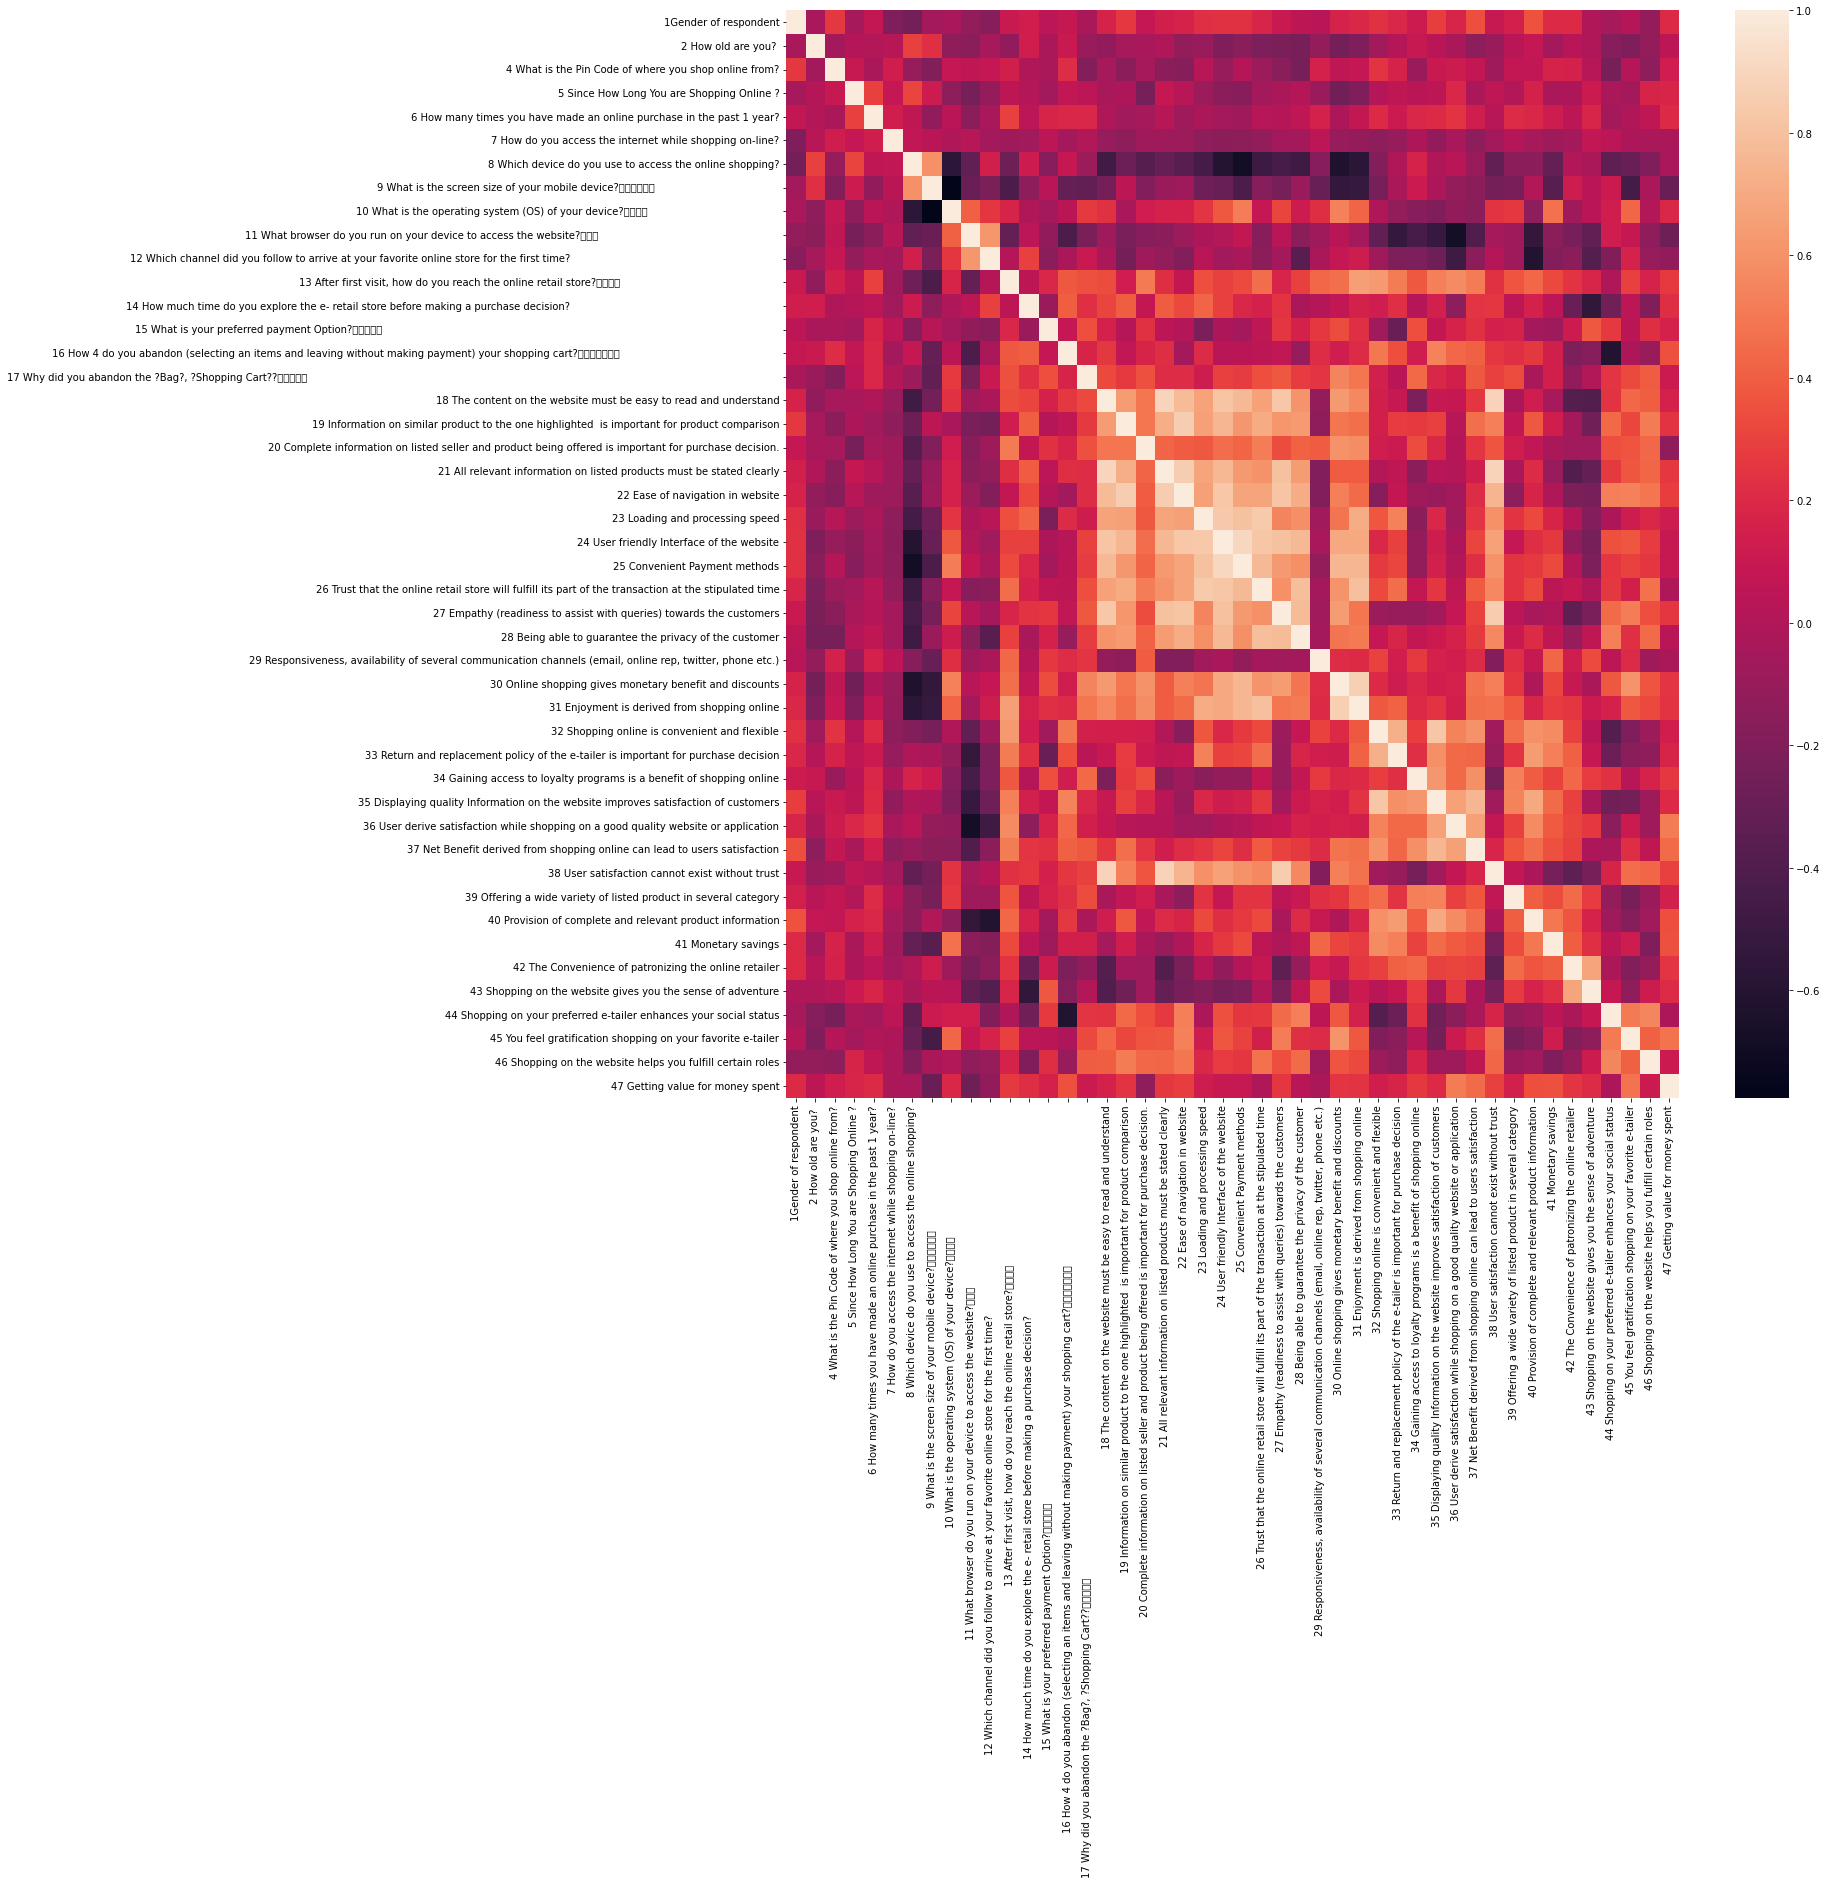

In [67]:
f , ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr())


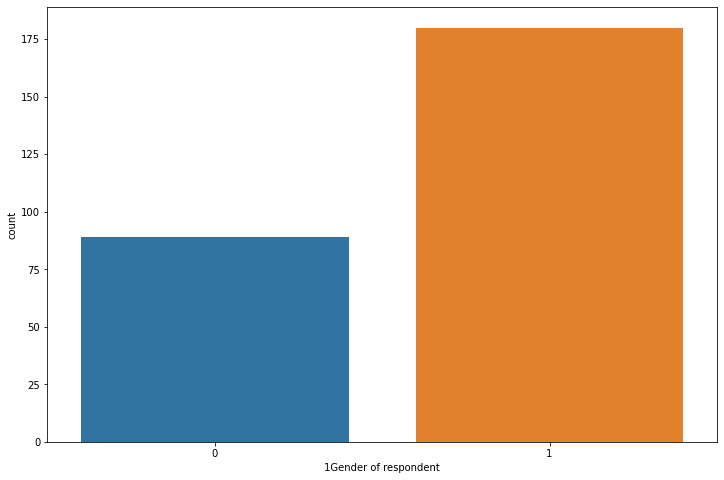

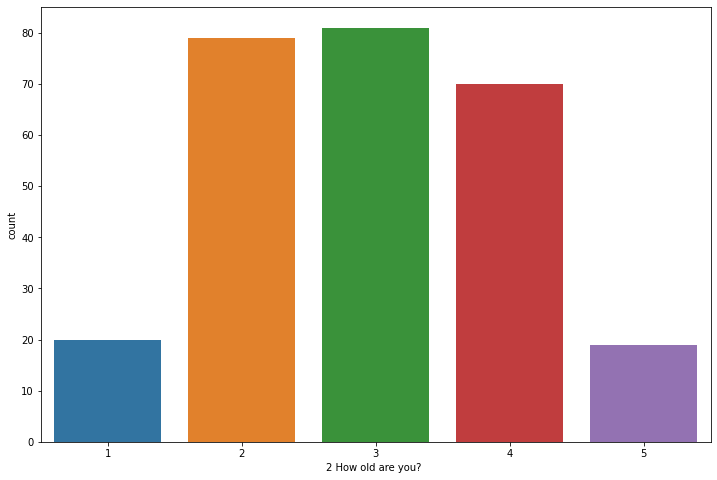

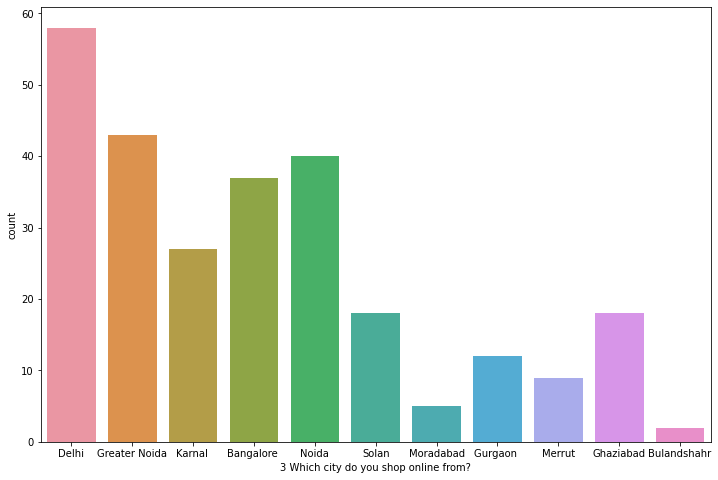

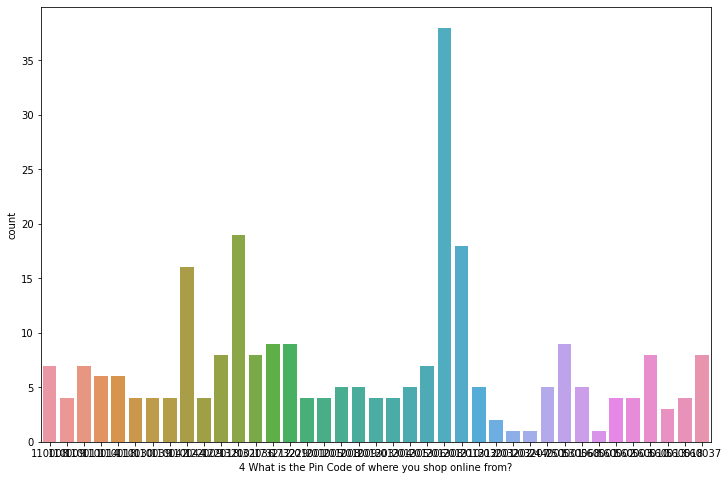

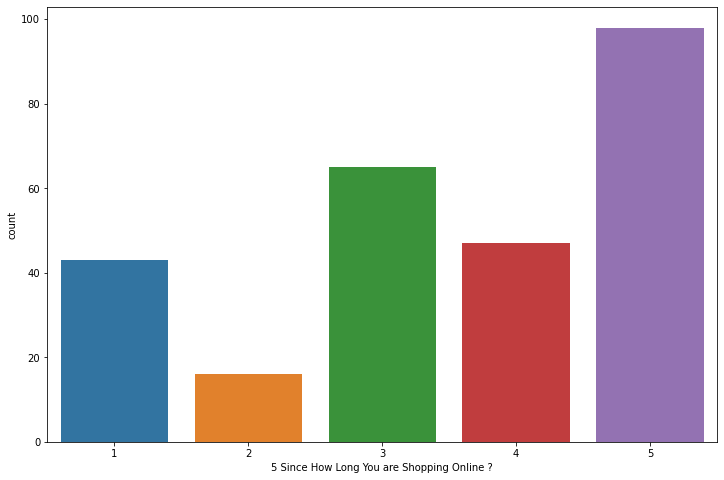

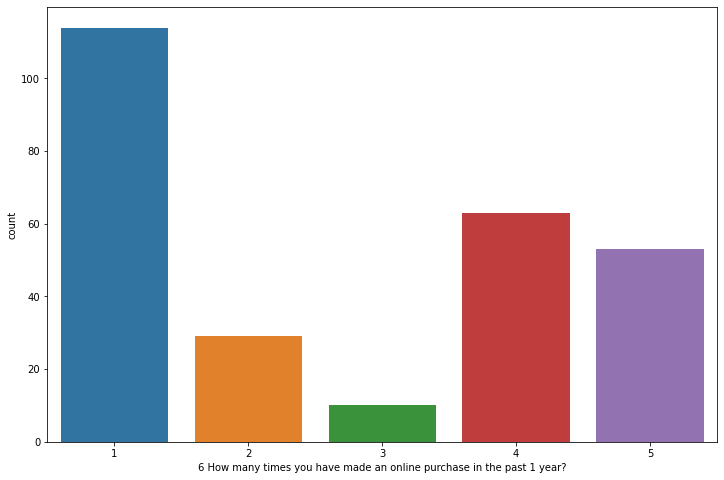

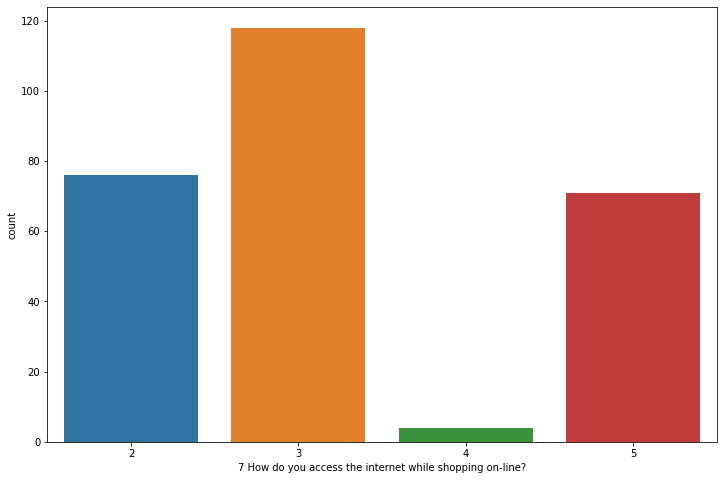

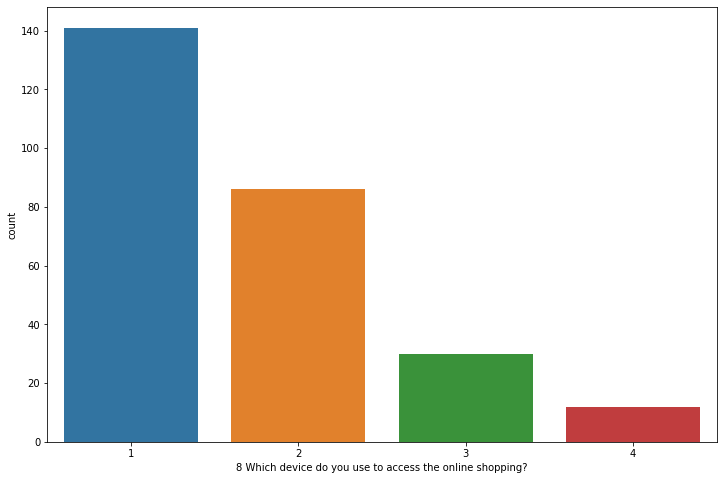

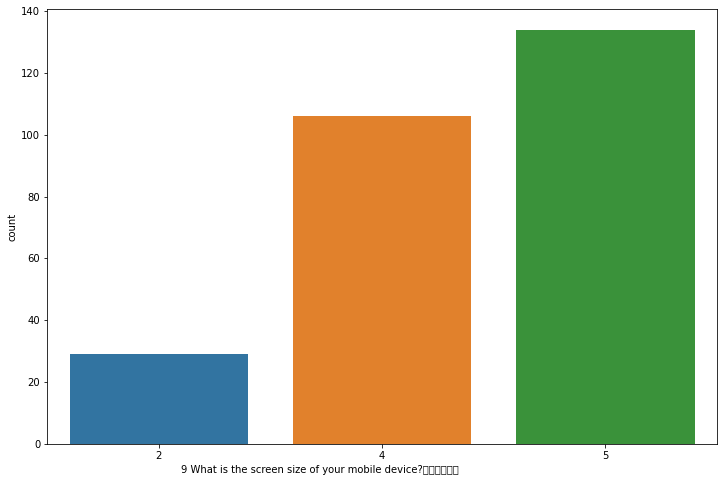

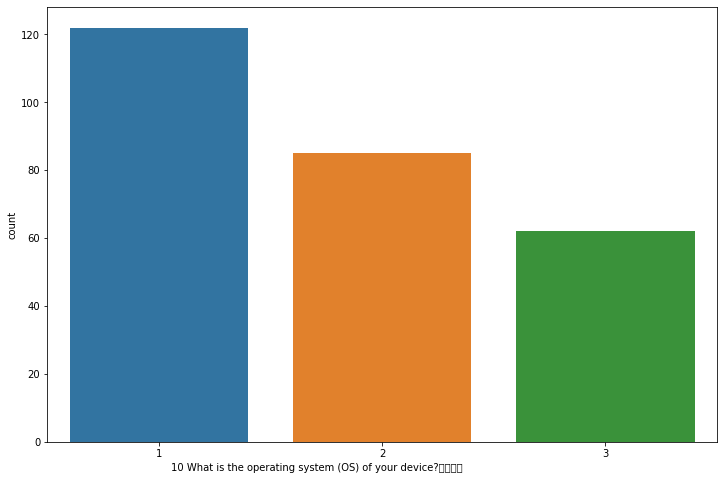

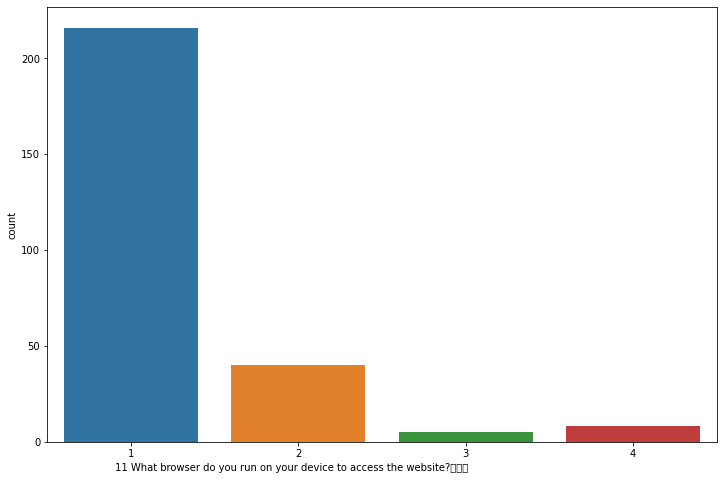

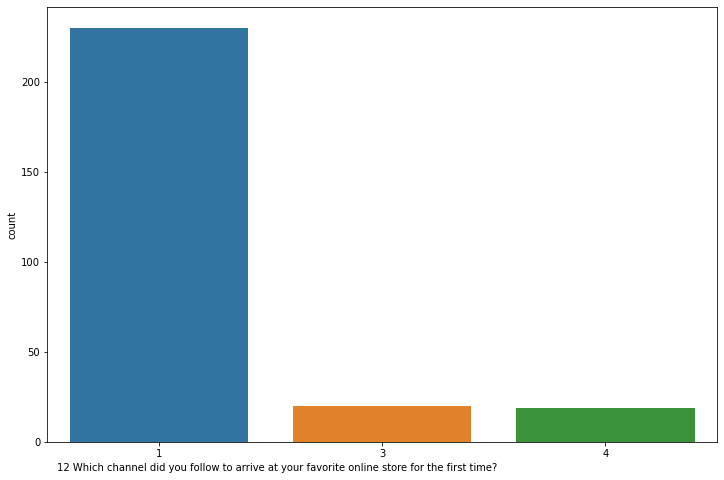

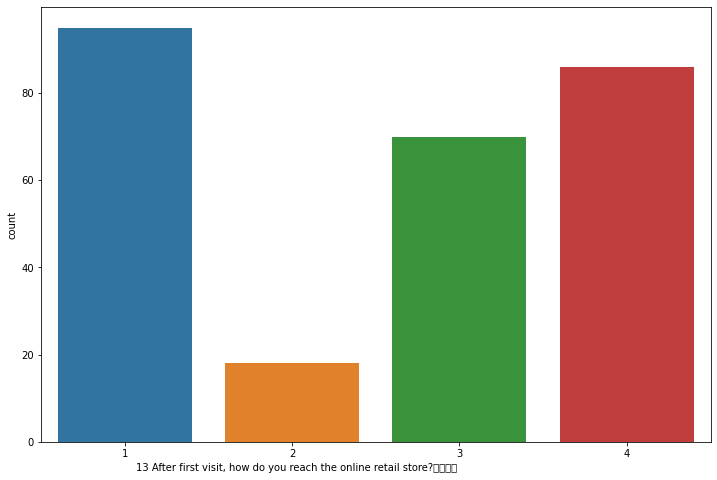

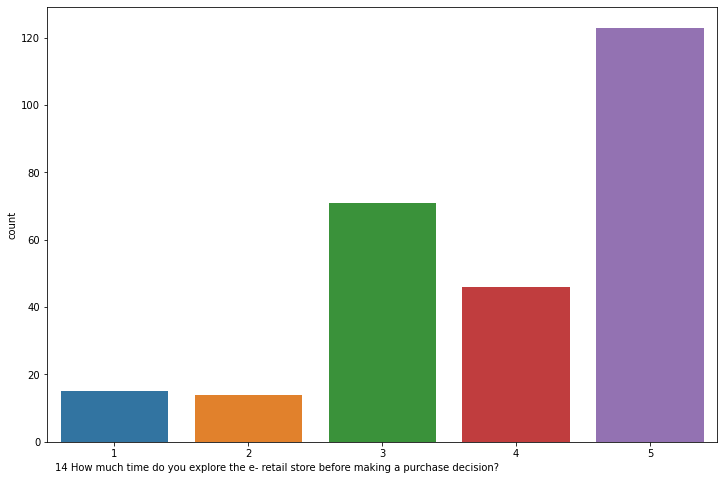

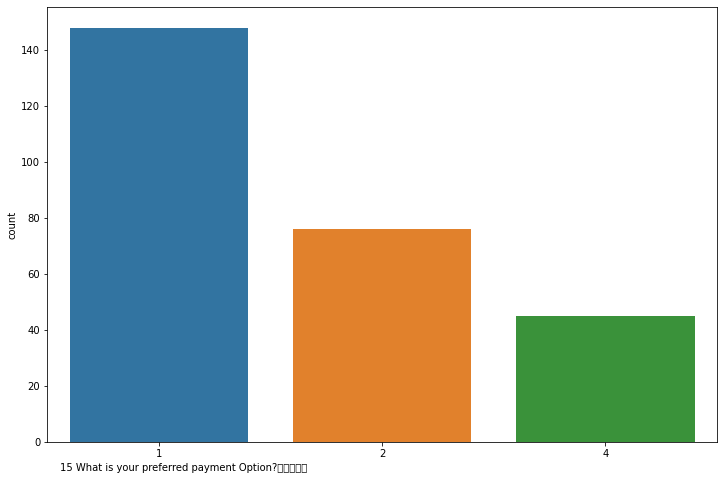

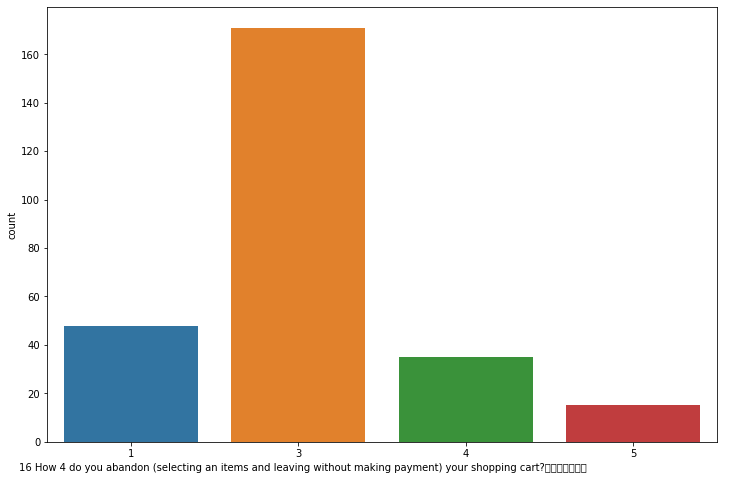

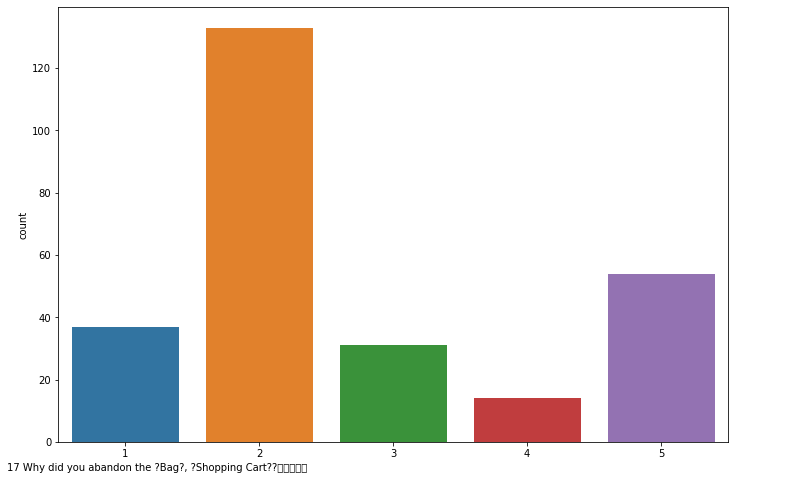

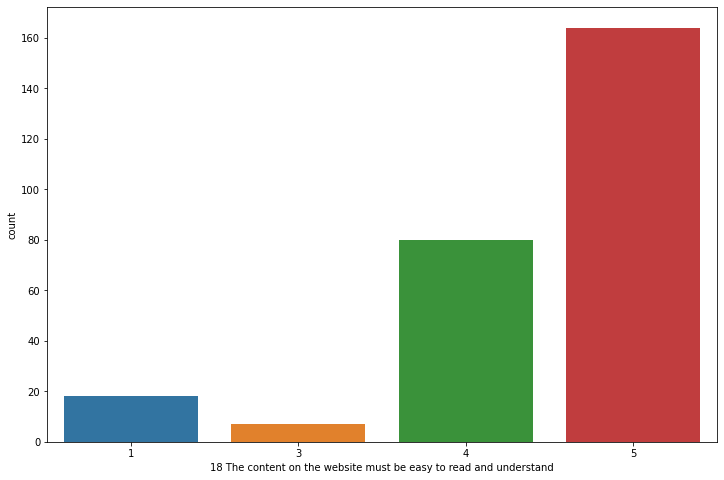

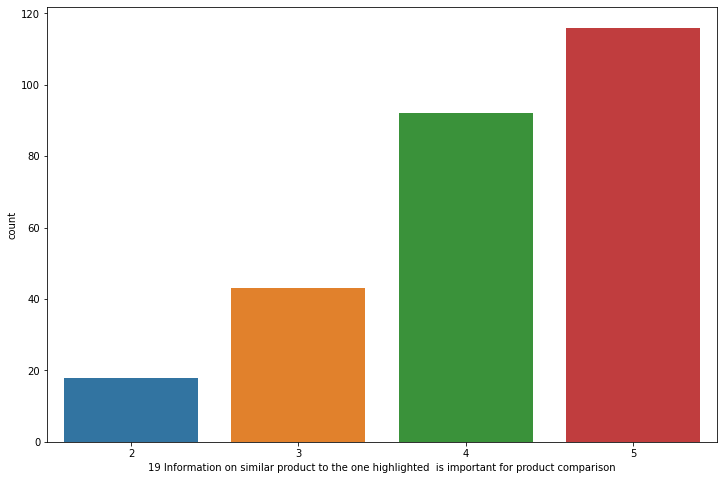

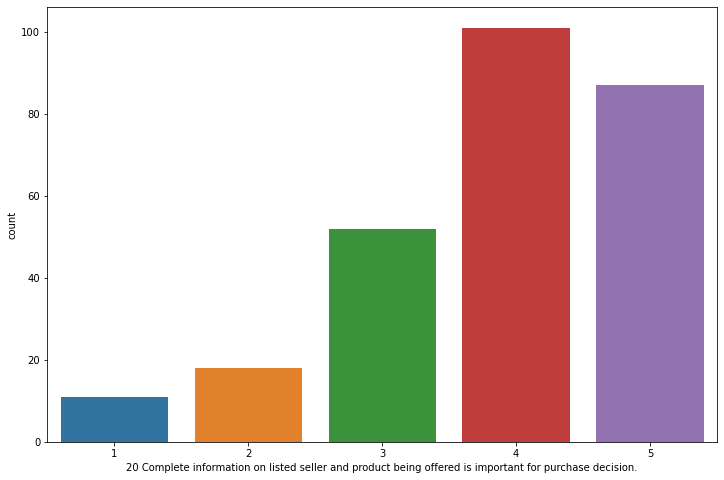

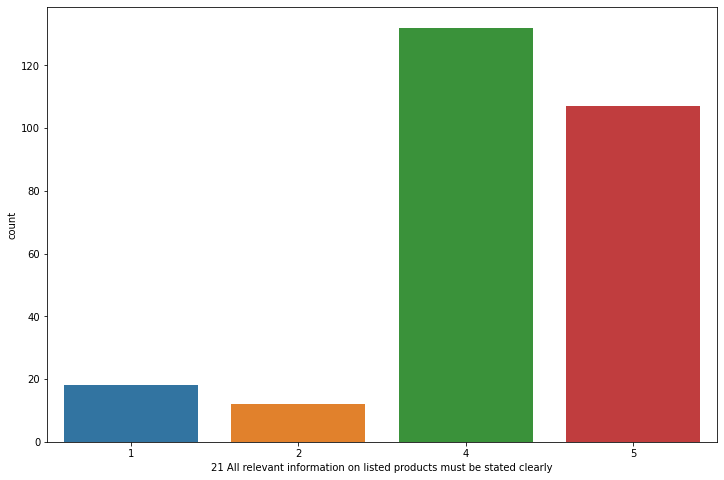

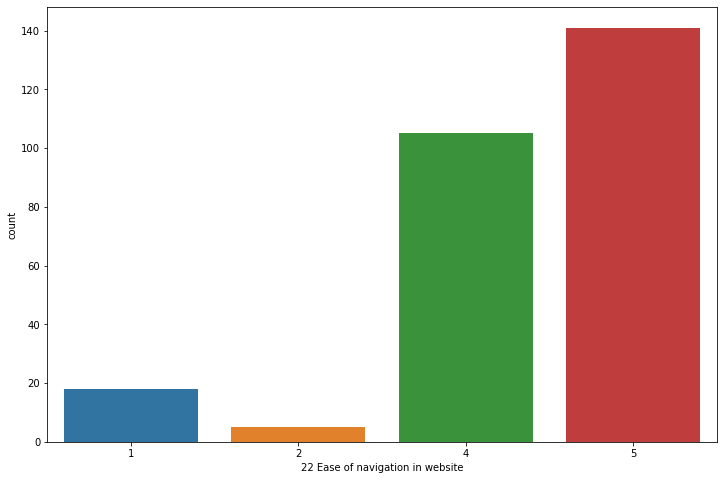

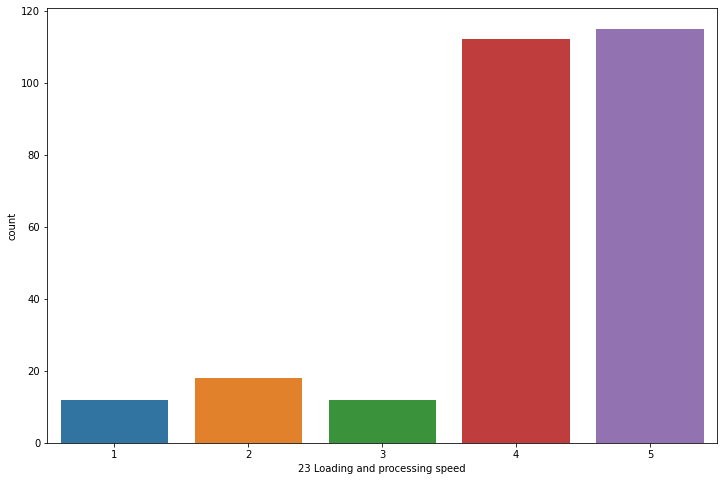

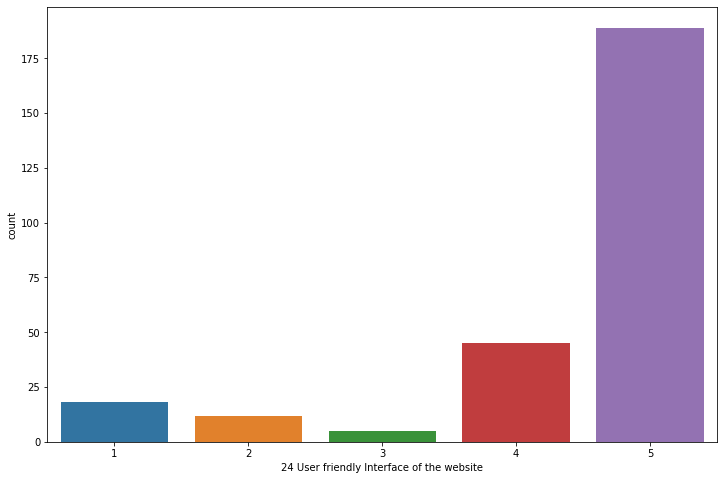

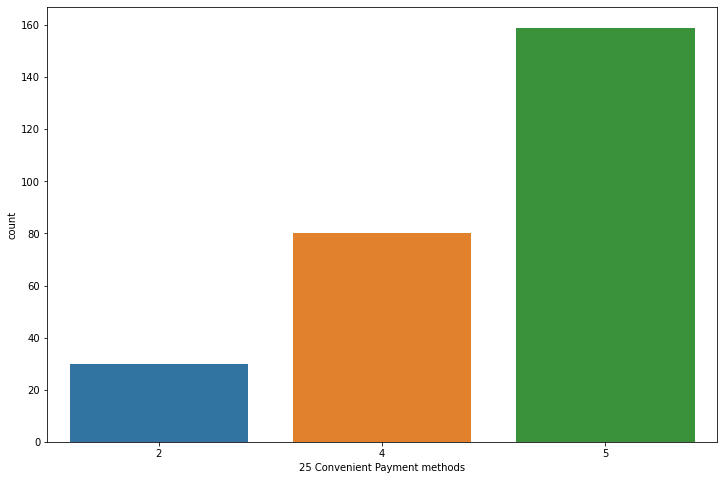

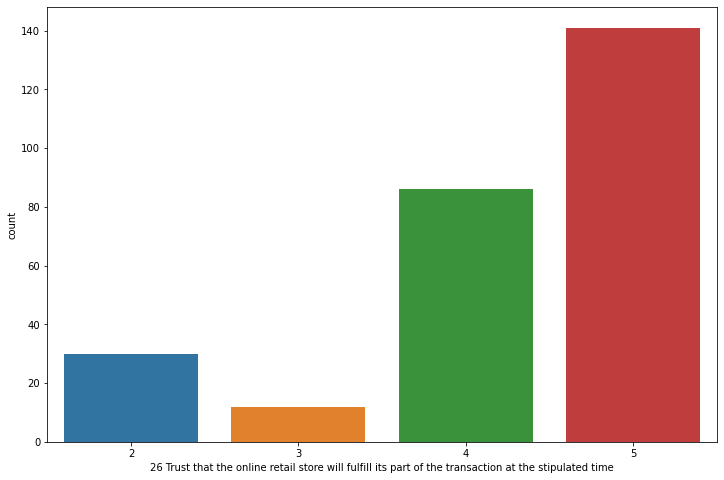

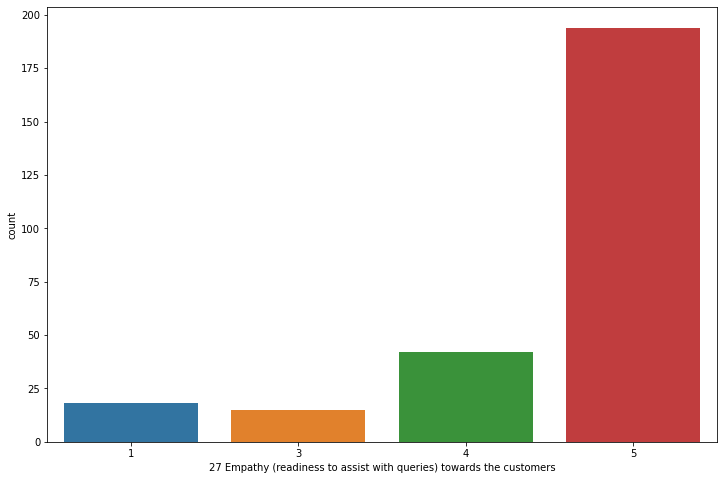

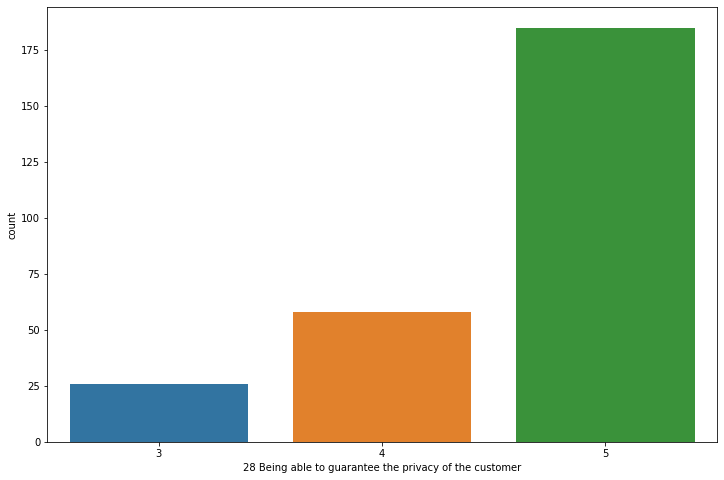

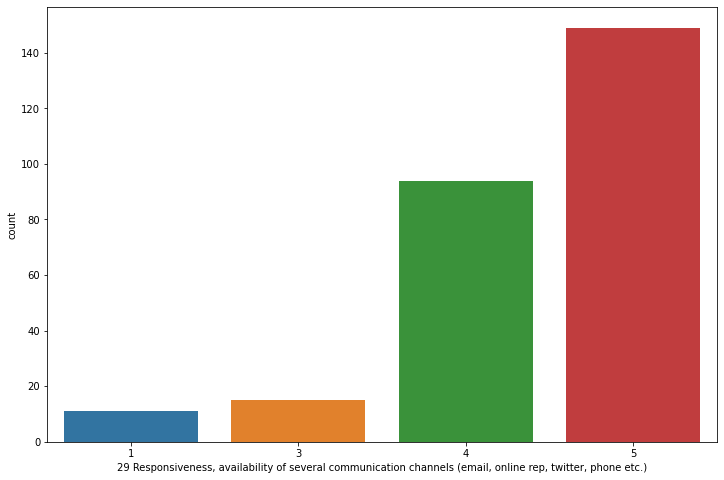

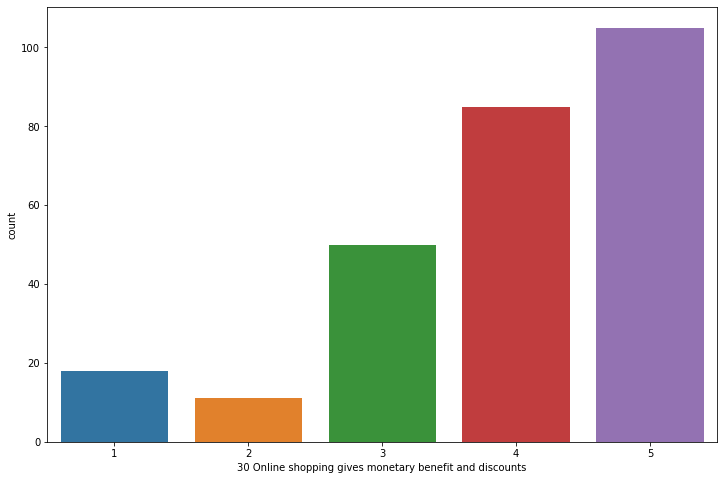

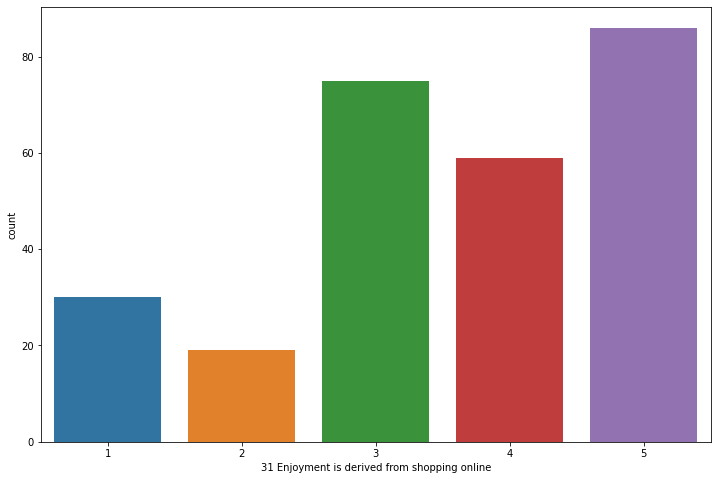

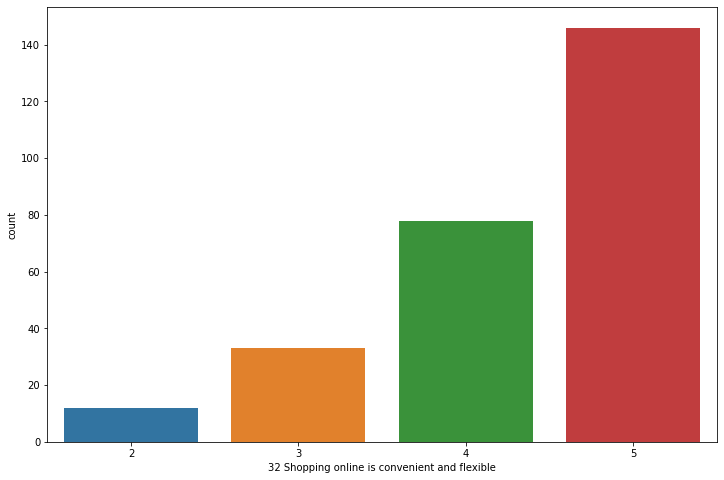

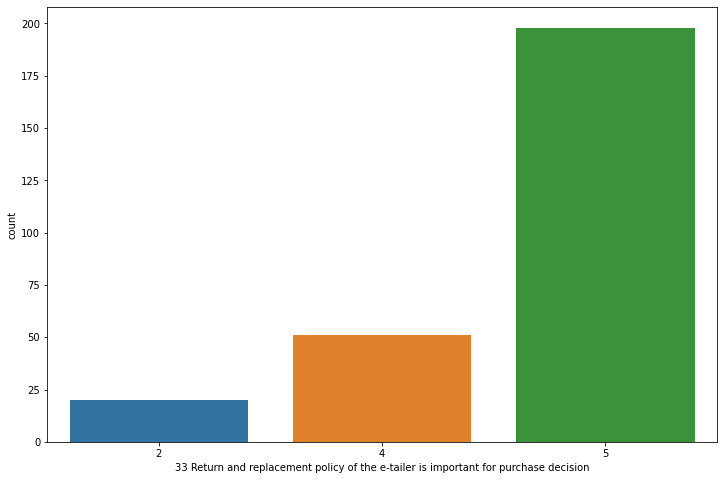

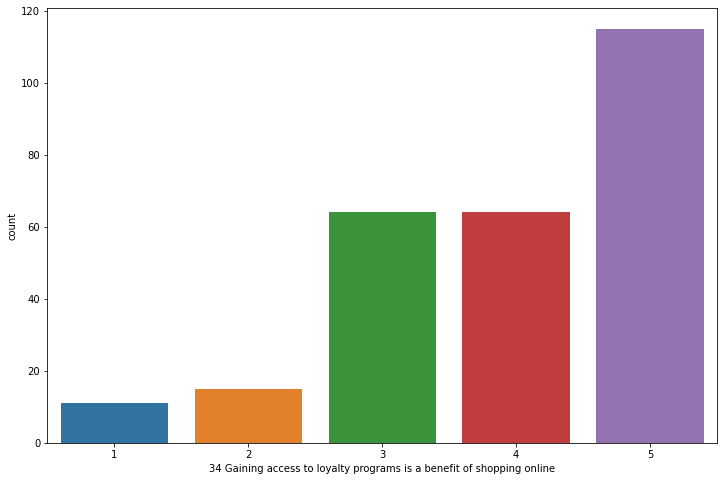

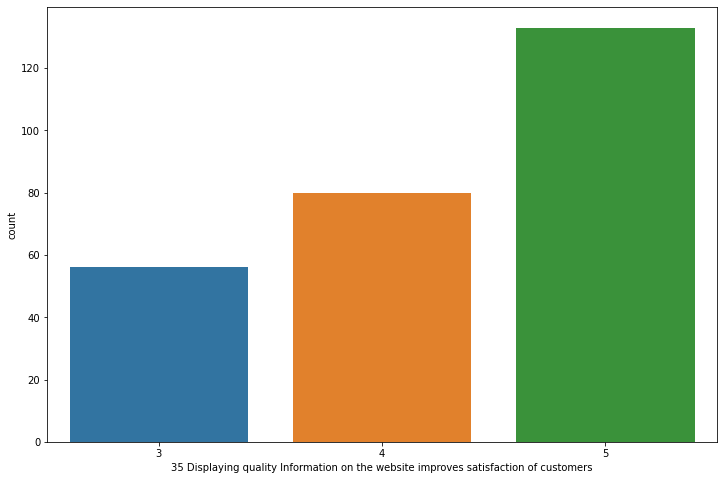

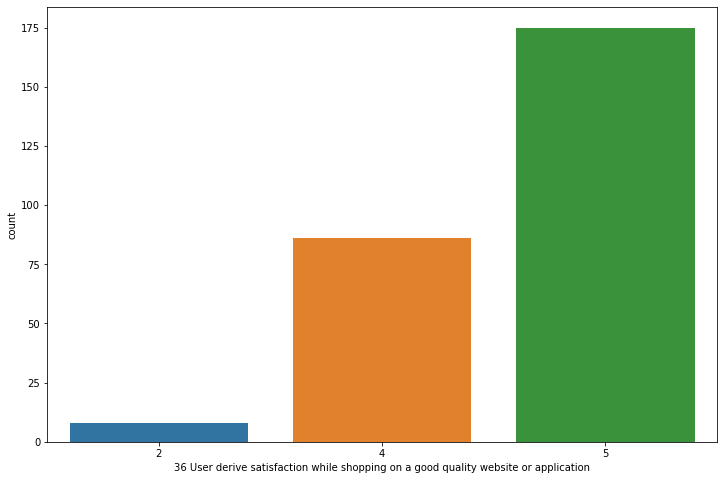

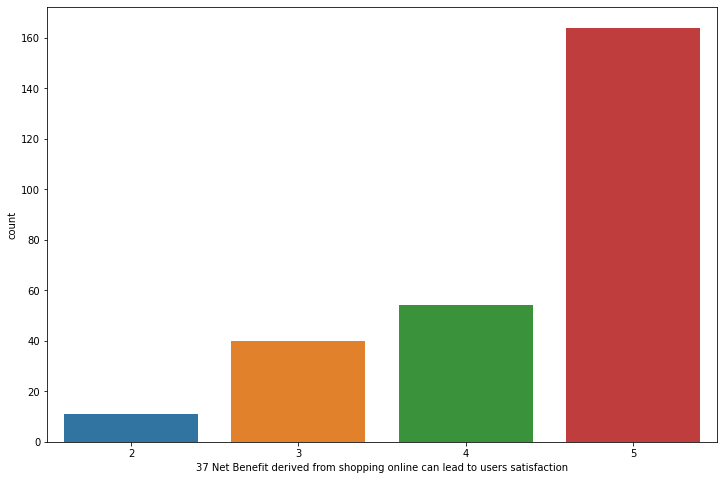

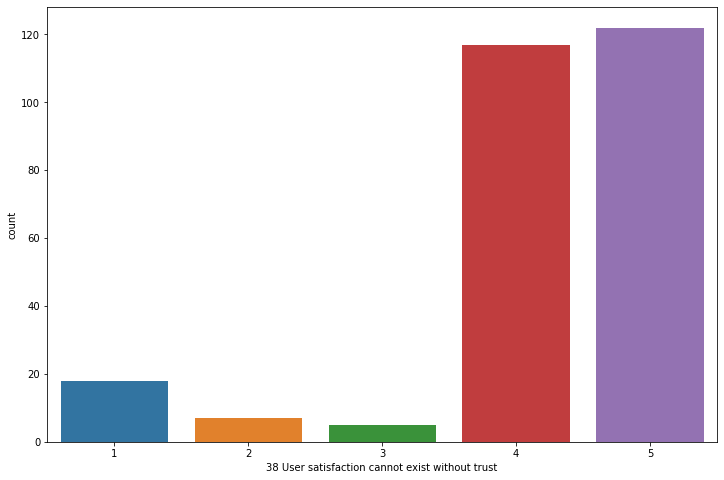

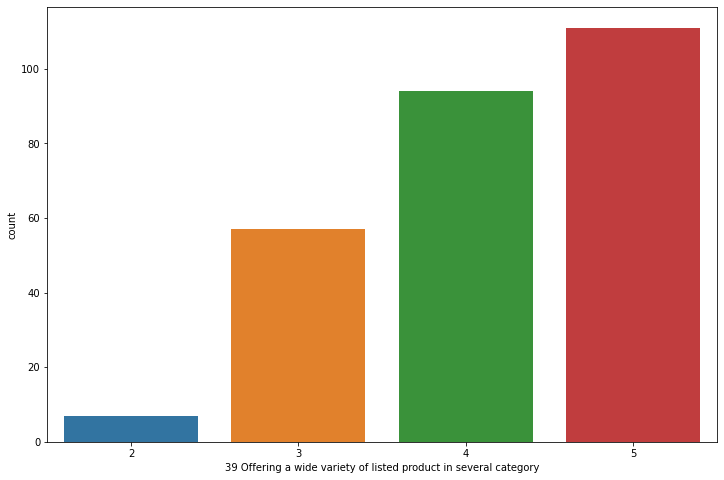

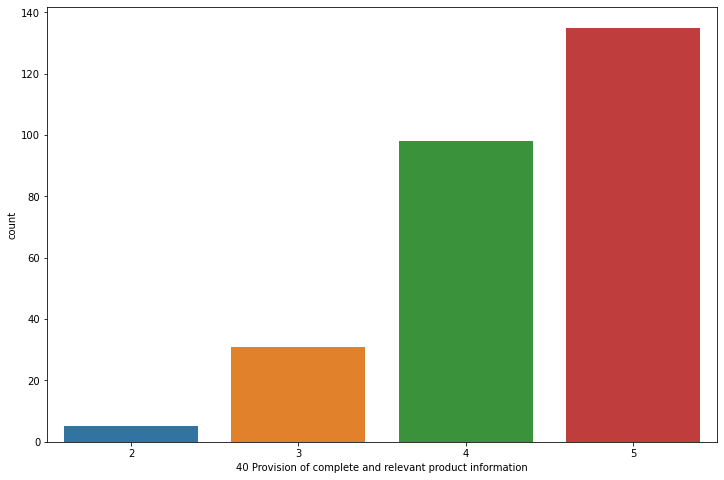

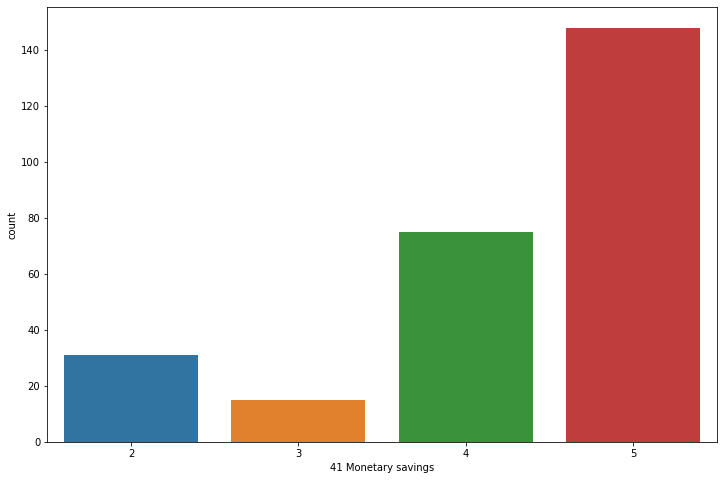

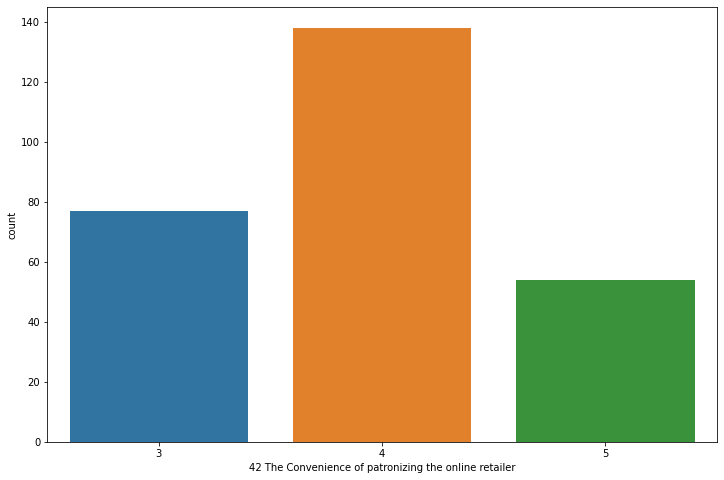

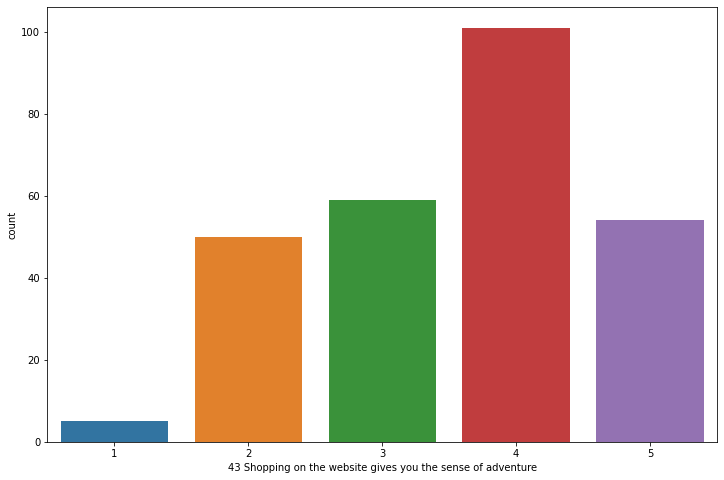

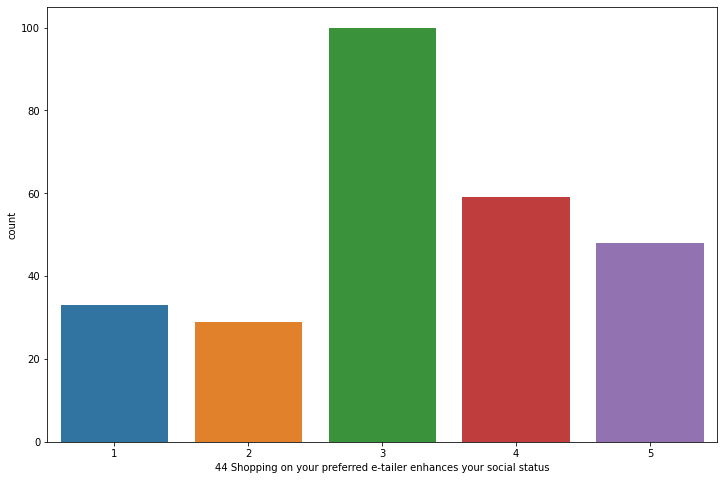

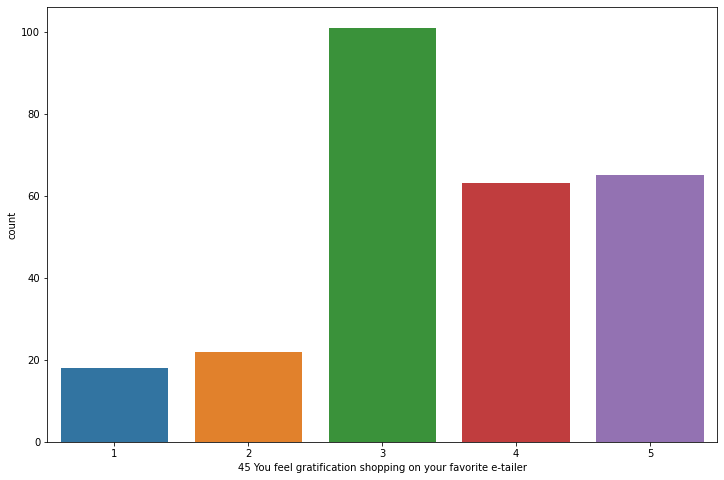

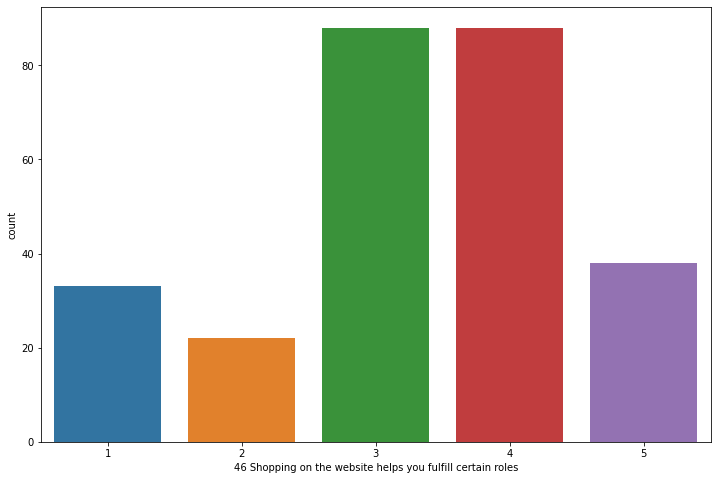

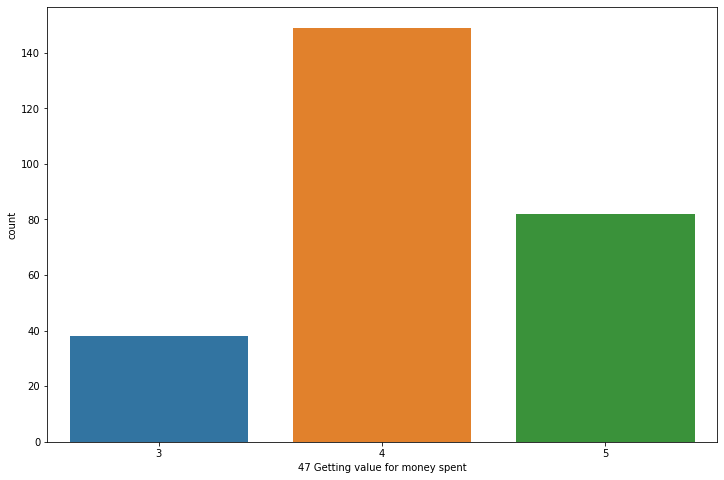

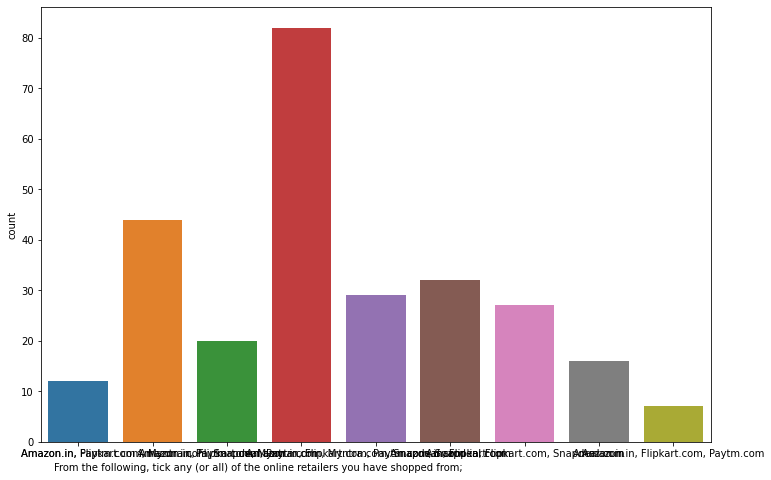

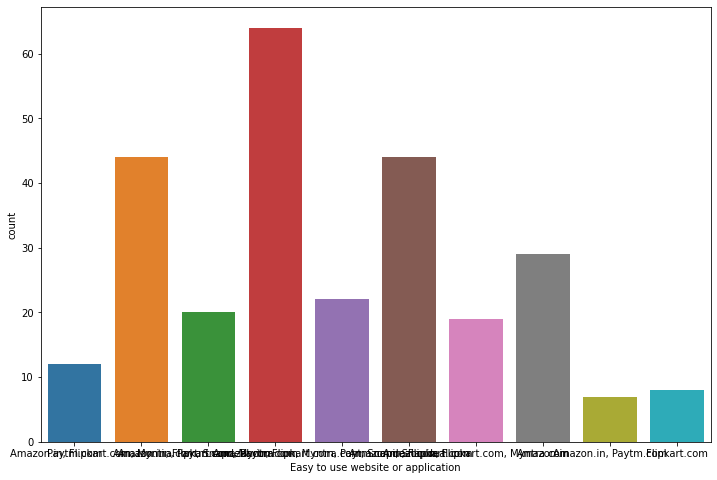

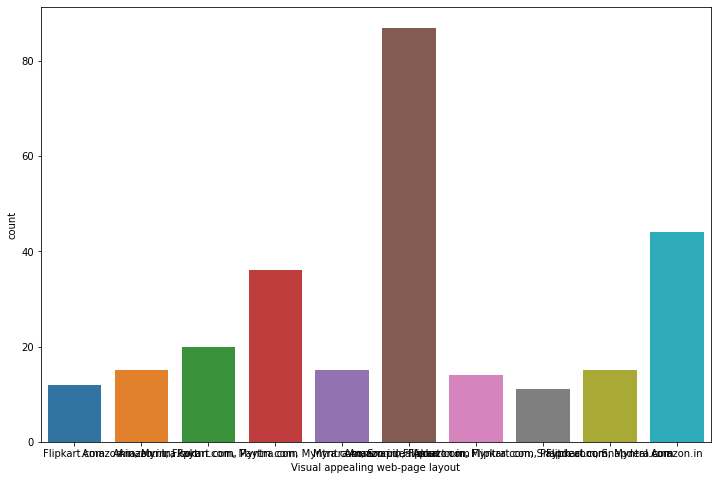

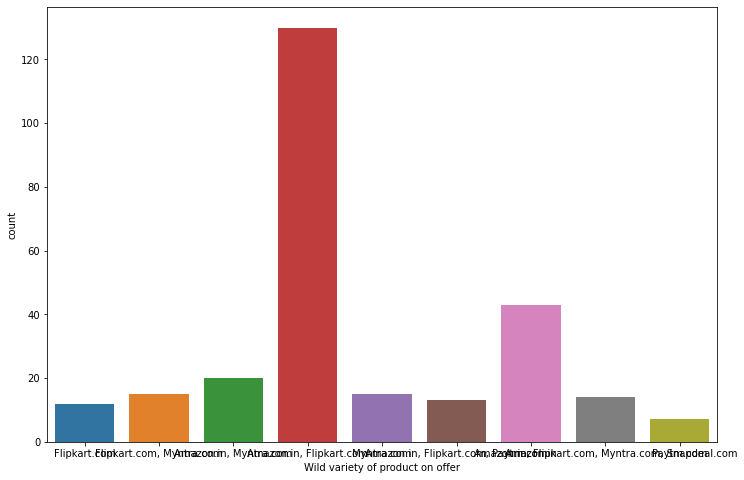

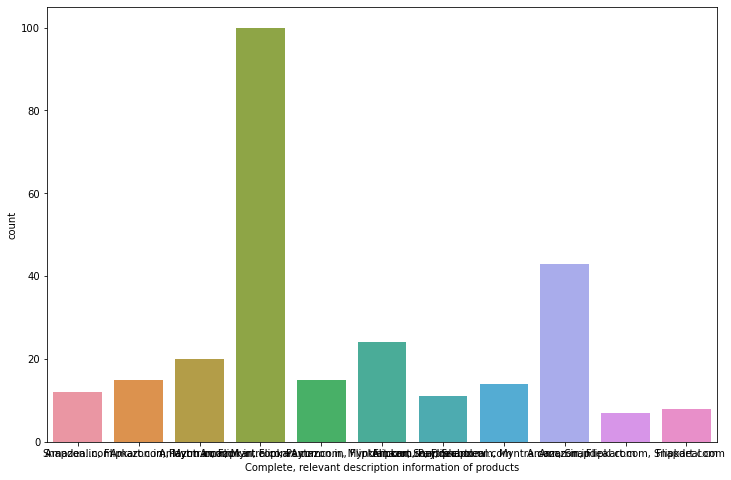

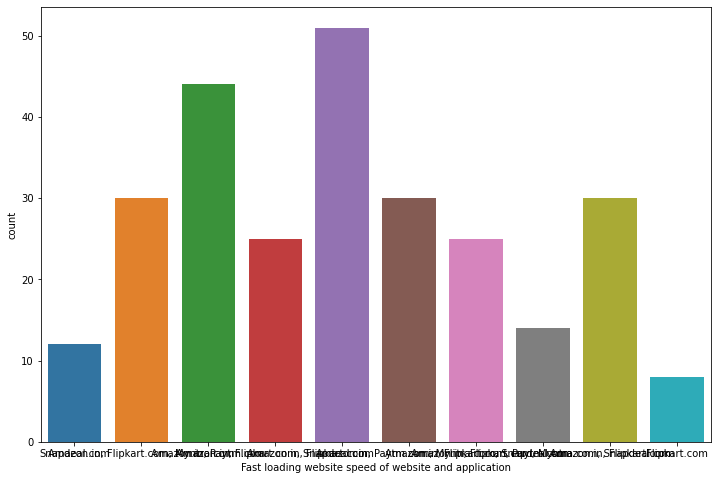

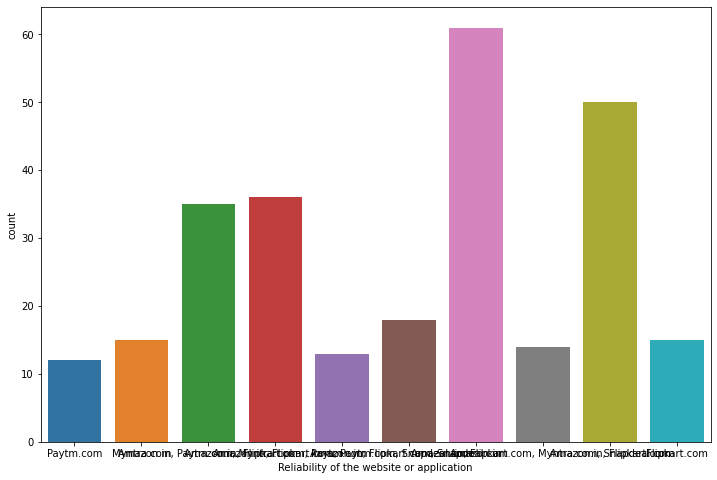

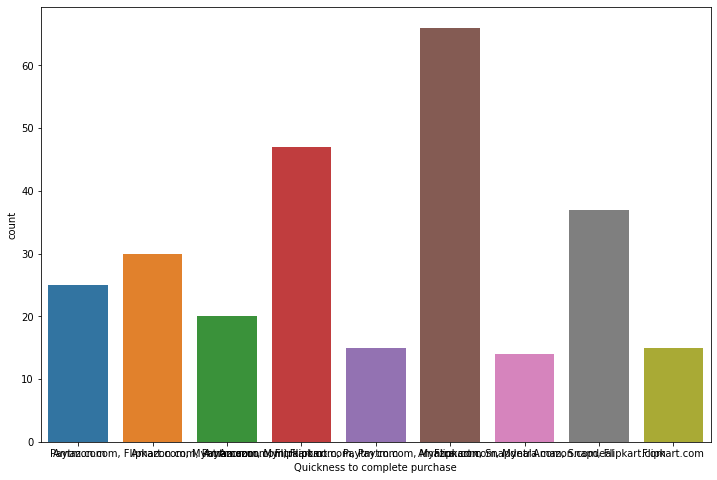

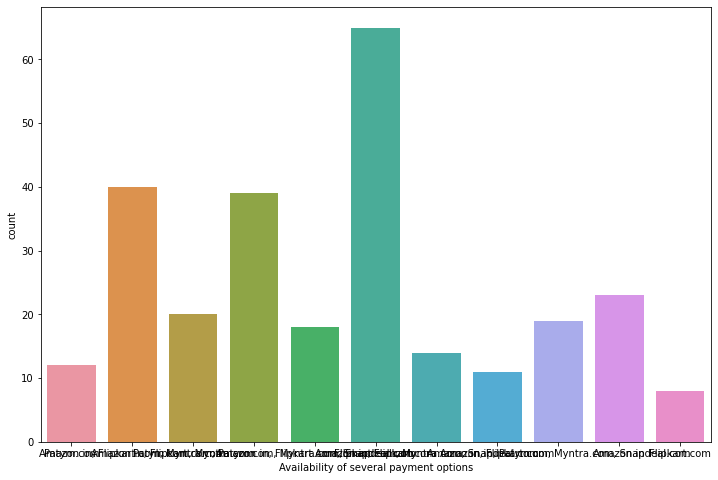

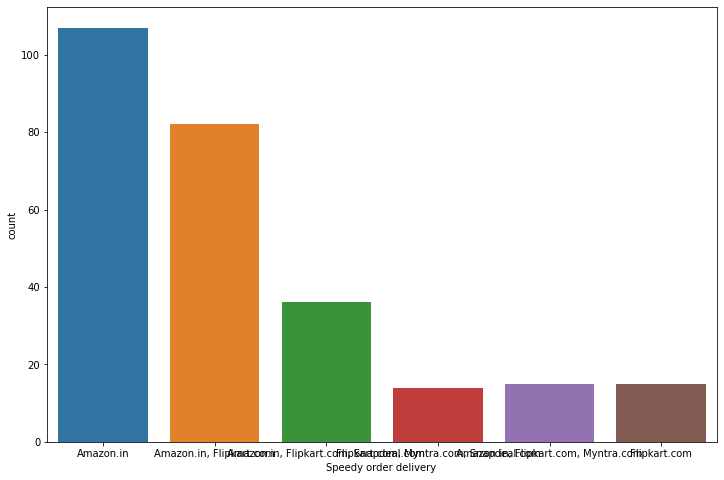

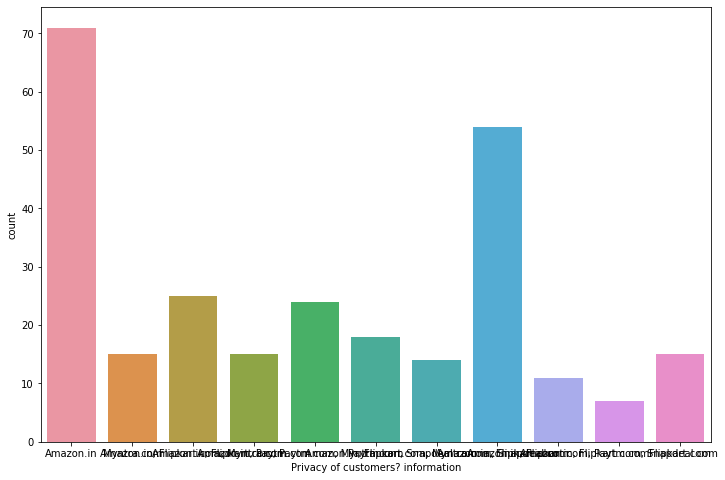

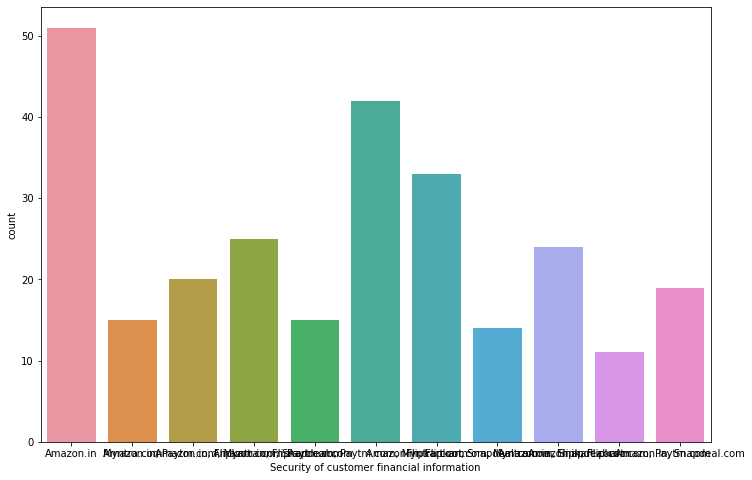

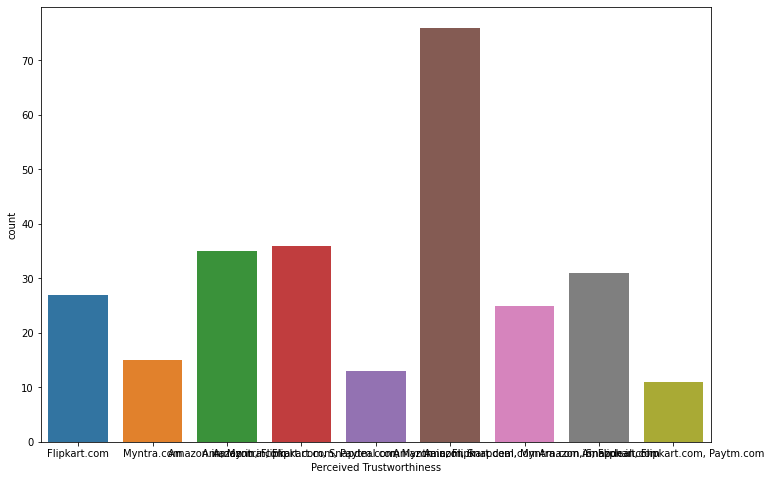

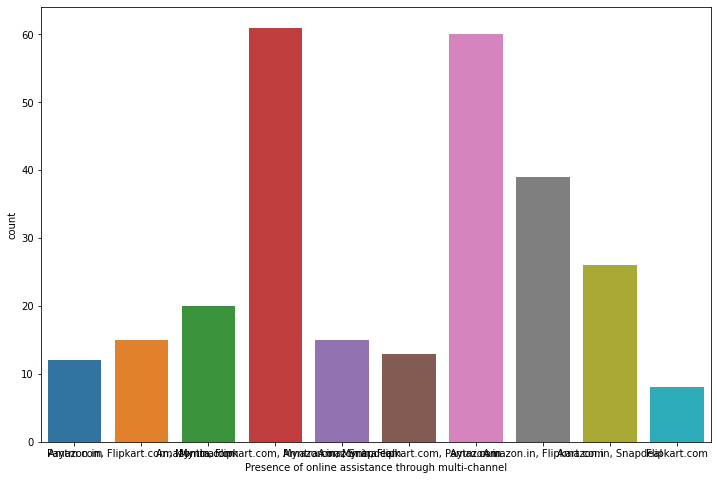

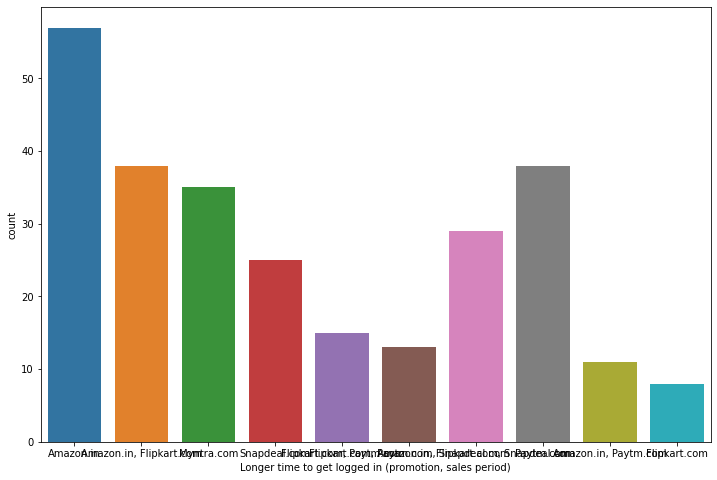

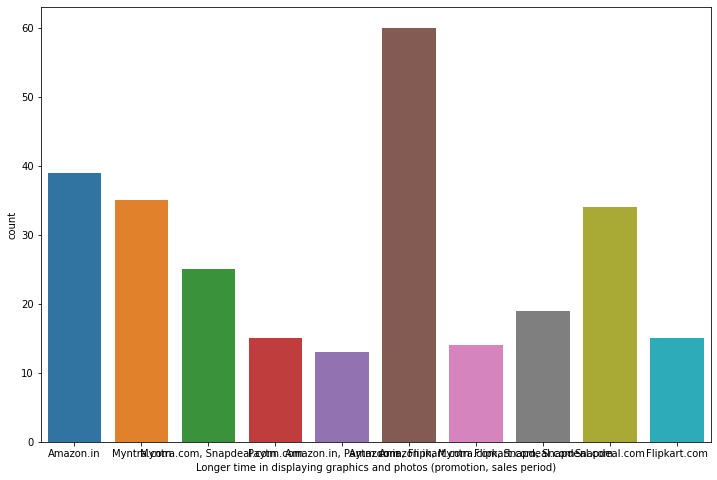

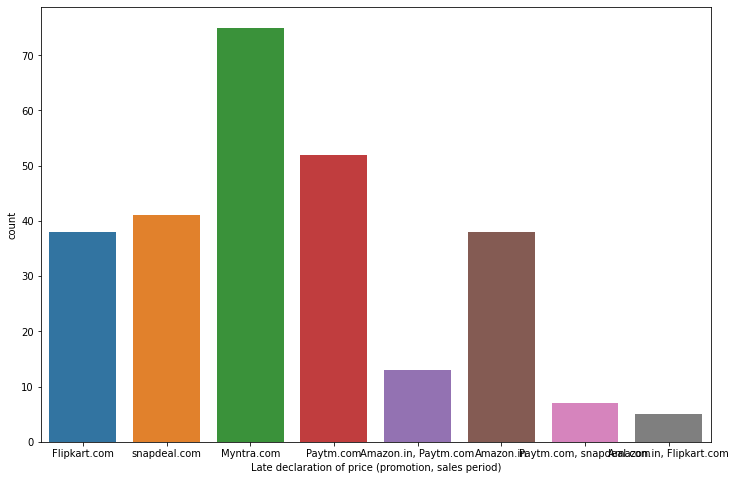

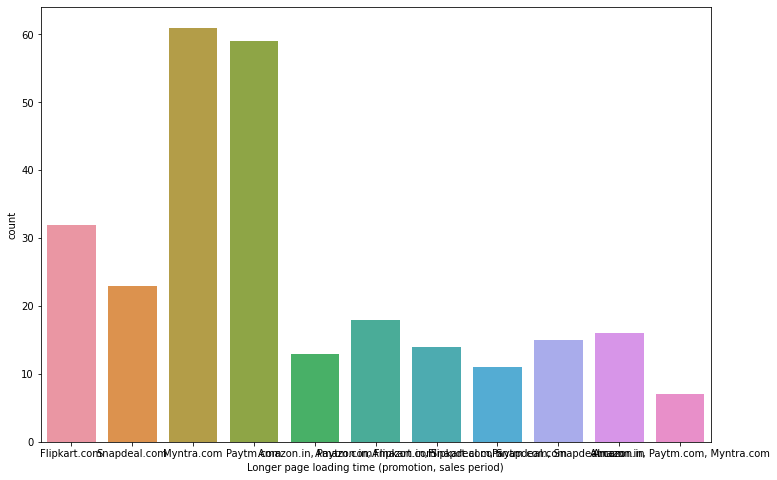

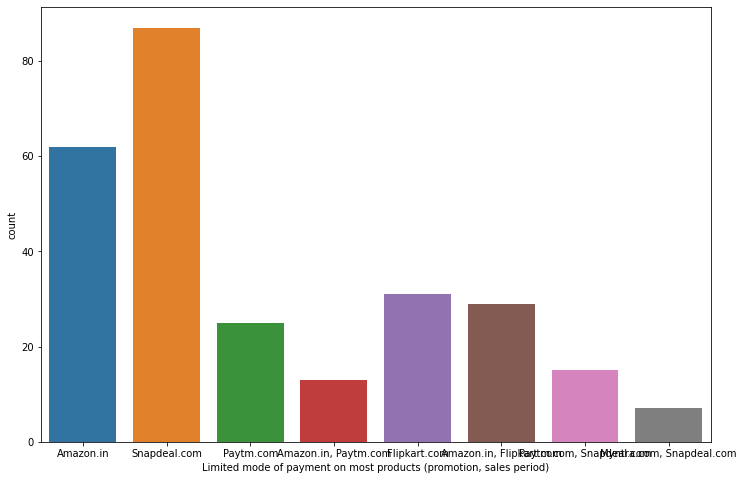

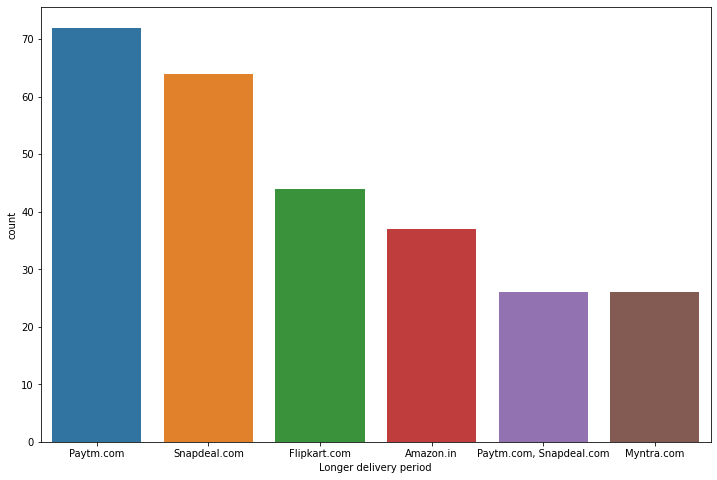

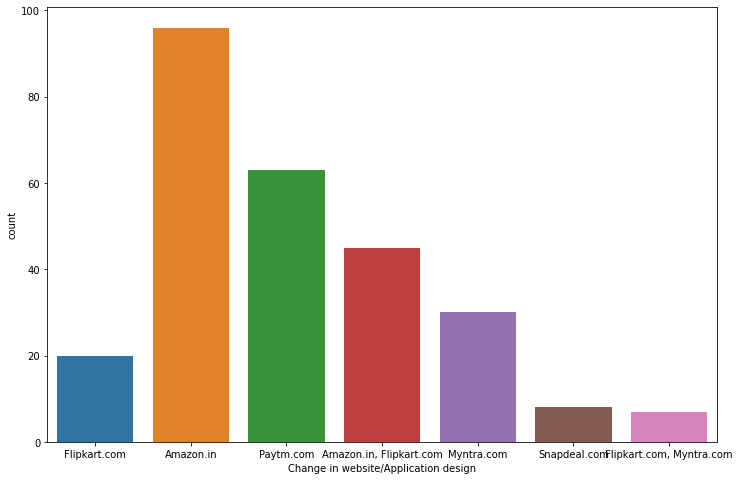

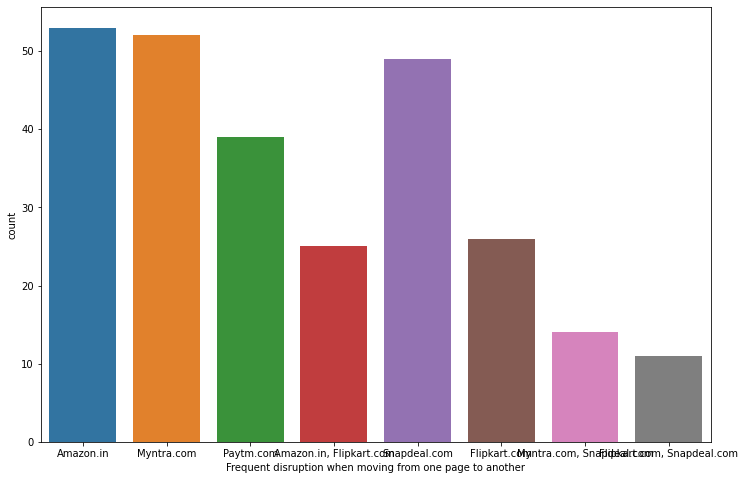

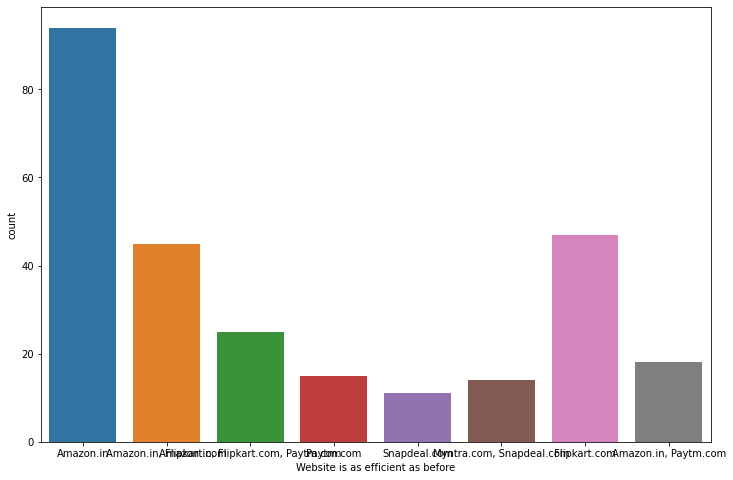

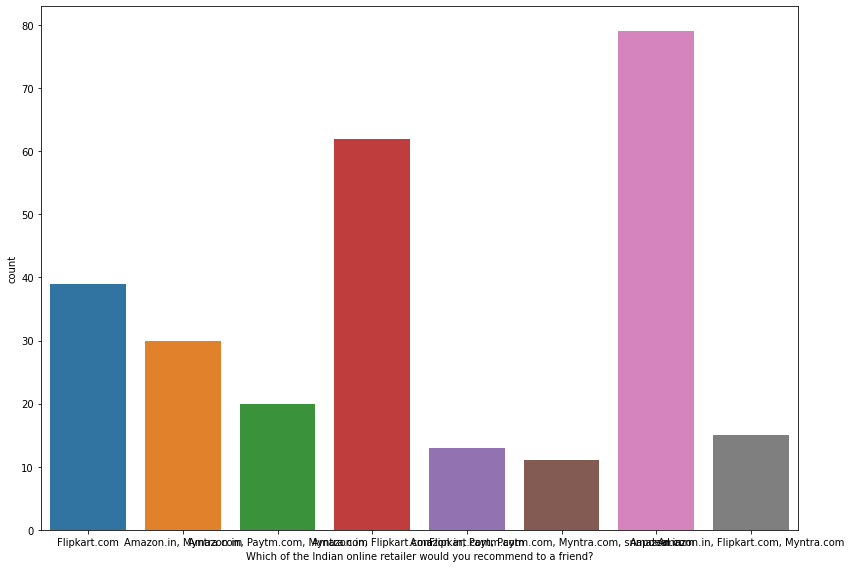

In [18]:
for i in df.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(df[i])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()